In [1]:
import time
import sys
import numpy as np
import pandas as pd 
import scipy.io as sio
import matplotlib.pyplot as plt
import sklearn.neural_network as nn
from sklearn import preprocessing

In [12]:
bsaScalarData = pd.read_pickle('data/processed/predictor.pkl')
Iz = np.load('data/processed/bunchSep.npy')

In [13]:
bsaScalarData = bsaScalarData[bsaScalarData.columns[-20:]]

In [15]:
bsaScalarData

,TORO_LI20_2452_TMIT,BPMS_LI20_2445_TMIT,TORO_LI20_3163_TMIT,BPMS_LI20_3315_Y,TORO_LI20_3255_TMIT,BPMS_LI20_3218_TMIT,BPMS_LI20_3265_TMIT,BPMS_LI20_3315_TMIT,BPMS_LI14_801_X,BPMS_LI20_3156_TMIT,BPMS_LI20_3265_Y,BPMS_LI14_715_Y,BPMS_LI20_3265_X,BPMS_LI20_3218_X,BPMS_LI20_3315_X,BPMS_LI14_701_Y,BPMS_LI20_3156_Y,BPMS_LI20_2445_X,BPMS_LI14_891_Y,BPMS_LI14_901_Y
0,0.540599,0.519010,0.605061,0.489196,0.595342,0.612423,0.611261,0.613642,0.500923,0.564684,0.486593,0.510995,0.555819,0.522803,0.672921,0.549134,0.596807,0.528467,0.334923,0.542728
1,0.449398,0.474755,0.556013,0.408083,0.538024,0.556808,0.558017,0.559670,0.566614,0.514663,0.390979,0.517737,0.516680,0.485558,0.643071,0.560331,0.617029,0.536070,0.339361,0.539113
2,0.494031,0.506883,0.602856,0.503575,0.603105,0.597847,0.599424,0.597642,0.510707,0.580402,0.562437,0.526581,0.420033,0.381555,0.596322,0.561545,0.552598,0.556639,0.343580,0.532798
3,0.575984,0.613793,0.727537,0.353431,0.733264,0.720792,0.720937,0.722848,0.285427,0.663382,0.336204,0.460820,0.442991,0.393197,0.578171,0.492525,0.672115,0.626316,0.455596,0.745911
4,0.489031,0.502712,0.605699,0.263326,0.589549,0.593350,0.592543,0.596235,0.516206,0.569497,0.254540,0.520796,0.483771,0.430140,0.634206,0.547023,0.715534,0.521194,0.356307,0.574478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,0.274735,0.278710,0.316463,0.277949,0.326642,0.325373,0.325415,0.328084,0.524887,0.311389,0.290270,0.478866,0.334535,0.313308,0.419210,0.524090,0.806206,0.589203,0.322203,0.535060
419,0.245106,0.240374,0.280708,0.233313,0.283497,0.281034,0.280318,0.280441,0.600754,0.258328,0.249829,0.479854,0.453418,0.451595,0.518030,0.521801,0.799013,0.411148,0.307771,0.511396
420,0.240858,0.257379,0.289878,0.200872,0.289291,0.299243,0.298399,0.301823,0.618150,0.275127,0.226583,0.425395,0.619531,0.583256,0.669758,0.474561,0.847364,0.306569,0.297665,0.514629
421,0.265487,0.274116,0.313618,0.171659,0.300879,0.318195,0.319839,0.320084,0.515672,0.297283,0.238745,0.469757,0.335203,0.321240,0.417086,0.515939,0.863959,0.681650,0.334675,0.537472


In [6]:
scale_x = preprocessing.MinMaxScaler(feature_range=(0,1))
for col in bsaScalarData.columns:
    x_col = bsaScalarData[[col]] 
    bsa_scaled = scale_x.fit_transform(x_col)
    bsaScalarData[col] = bsa_scaled

c = []

for n in range(bsaScalarData.shape[1]):
    X = np.array(bsaScalarData)[:,n]
    Y = Iz/np.max(Iz)
    R = np.corrcoef(X, Y)
    c.append(R[0, 1])

c = np.array(c)
# c = c[~np.isnan(c)]
absc = np.abs(c)
idx = np.argsort(absc)

bsaScalarData = bsaScalarData[bsaScalarData.columns[idx]]

In [139]:
c = []

for n in range(bsaScalarData.shape[1]):
    X = np.array(bsaScalarData)[:,n]
    Y = Iz
    R = np.corrcoef(X, Y)
    c.append(R[0, 1])

c = np.array(c)
c = c[~np.isnan(c)]
absc = np.abs(c)
idx = np.argsort(absc)

bsaScalarData = bsaScalarData[bsaScalarData.columns[idx]]

/Users/siddhant/Library/Python/3.12/lib/python/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/siddhant/Library/Python/3.12/lib/python/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [16]:
def trunc_norm(mu,sigma,ntrunc,nsamples):
    import scipy.stats as stats
    lower, upper = -ntrunc*sigma, ntrunc*sigma
    X = stats.truncnorm(
    (lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
    out = X.rvs(nsamples)
    return out

In [17]:
nsims=bsaScalarData.shape[0]
X = bsaScalarData

ntrain = int(np.round(nsims*0.8))
ntest = int(np.round(nsims*0.2))

In [18]:
idx = np.random.permutation(nsims)
idxtrain = idx[0:ntrain]
idxtest = idx[ntrain:ntrain+ntest]

In [19]:
Iz_scaled = Iz/np.max(Iz)
Iz_train_scaled = Iz_scaled[idxtrain]
Iz_test_scaled = Iz_scaled[idxtest] 

In [20]:
from sklearn.model_selection import train_test_split

X_train_scaled, X_test_scaled = train_test_split(X, test_size=0.2, random_state= 42, shuffle=True)
Iz_train_scaled, Iz_test_scaled = train_test_split(Iz_scaled, test_size=0.2, random_state= 42, shuffle=True)

In [231]:
X_train_scaled = pd.DataFrame(index=idxtrain, columns=X.columns)
X_test_scaled = pd.DataFrame(index=idxtest, columns=X.columns)

scale_x = preprocessing.MinMaxScaler(feature_range=(0,1))
for col in X.columns:
    x_col = X[[col]] 
    X_scaled = scale_x.fit_transform(x_col)
    
    X_train_scaled[col] = X_scaled[idxtrain, 0]
    X_test_scaled[col] = X_scaled[idxtest, 0]

Elapsed time [mins] = 0.0 
Score on training set = 44.635  %
Score on test set = -2.833 %


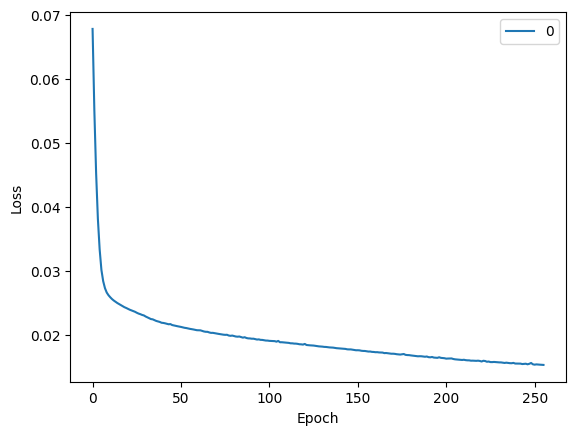

In [23]:
nn_model_curprof = nn.MLPRegressor(
    activation = 'relu',
    alpha = 1.0e-4,
    batch_size = 24,
    tol = 1e-4,# default 1e-4
#    hidden_layer_sizes = (500,200,100),
#    hidden_layer_sizes = (1000,500,500),
    hidden_layer_sizes = (100, 50,10),#98% accuracy 5e-5 learning rate
    solver = 'adam',
    learning_rate = 'adaptive',# Only for sgd solver
    learning_rate_init = 5.0e-5,
    max_iter = 5000,
    beta_1 = 0.9,beta_2=0.999,# Only for adam solver
    shuffle = True,
    early_stopping = True,
    validation_fraction = 0.2,
    verbose = False,
    momentum = 0.7,# Only used for sgd solver
    warm_start = False,
    random_state = None
)
t0 = time.time()
# Fit the nn model on the training set
nn_model_curprof.fit(X_train_scaled,Iz_train_scaled)
elapsed = time.time() - t0
print("Elapsed time [mins] = {:.1f} ".format(elapsed/60))
# Predict on training and validation set
predict_Iz_train = nn_model_curprof.predict(X_train_scaled)
predict_Iz_test = nn_model_curprof.predict(X_test_scaled)
#%% Print results and plot score
print("Score on training set = {0:.3f} ".format(nn_model_curprof.score(X_train_scaled,Iz_train_scaled)*100),"%")
print("Score on test set = {0:.3f}".format(nn_model_curprof.score(X_test_scaled,Iz_test_scaled) * 100),"%")
# print("Train RMSE:", np.sqrt(np.mean((Iz_train_scaled - nn_model_curprof.predict(X_train_scaled))**2)))
# print("Test RMSE:", np.sqrt(np.mean((Iz_test_scaled - nn_model_curprof.predict(X_test_scaled))**2)))
if nn_model_curprof.solver == 'adam':
    pd.DataFrame(nn_model_curprof.loss_curve_).plot()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

# #%% Make a histogram of the score
# score = np.zeros(Iz_train_scaled.shape[0])
# for n in range(Iz_train_scaled.shape[0]):
#      trueval = Iz_train_scaled[n]
#      predval = predict_Iz_train[n]
#      rmse = ((trueval-predval)**2).sum()
#      norm = ((trueval-trueval.mean())**2).sum()
#      score[n]= 1-rmse/norm # R^2 score 
# idx = score>0 & np.isfinite(score)    
# plt.hist(score[idx])
# plt.xlabel("Score")
# #plt.xlim([0,1])
# # plt.show()
# print(np.mean(score[np.isfinite(score)]))    

In [253]:
import joblib
# dirr = 'model/'
joblib_file = 'model/MLP_E338_12710.pkl'  
joblib.dump(nn_model_curprof, joblib_file)
#   # #Save stuff to matlab variables so I can put them into my figure of merit function
# sio.savemat(dirr+'Iz_test_scaledreluwFWHMSYAG.mat',mdict={'Iz_test_scaled': Iz_test_scaled*np.max(Iz)})
# sio.savemat(dirr+'predict_Iz_test_scaledreluwFWHMSYAG.mat',mdict={'predict_Iz_test': predict_Iz_test*np.max(Iz)})
# sio.savemat(dirr+'Iz_test_shotsreluwFWHMSYAG.mat',mdict={'idxtest': idxtest})

#Load nn model from file
joblib_model = joblib.load(joblib_file)

# # Calculate the accuracy and predictions
score = joblib_model.score(X_test_scaled,Iz_test_scaled)  
print("Test score: {0:.3f} %".format(100 * score)) 

Test score: 47.272 %


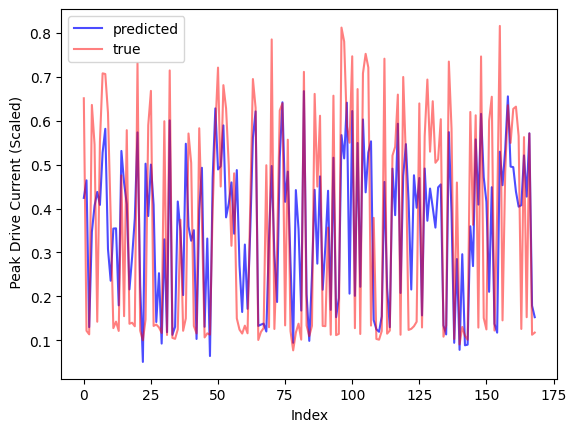

In [254]:
plt.plot(joblib_model.predict(X_test_scaled), 'b-', alpha = 0.7, label = 'predicted')
plt.plot(Iz_test_scaled, 'r-', alpha = 0.5, label = 'true')
plt.ylabel(" Peak Drive Current (Scaled)")
plt.xlabel("Index")
plt.legend()
plt.show()